<a href="https://colab.research.google.com/github/denam98/IoT_with_raspberryPI/blob/main/ARIMA_test_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

           obs_val
date              
2012 1 1      91.0
2012 1 2      90.0
2012 1 3      89.0
2012 1 4      89.0
2012 1 5      95.0
2012 1 6      93.0
2012 1 7      96.0
2012 1 8      96.0
2012 1 9      98.0
2012 1 10     93.0


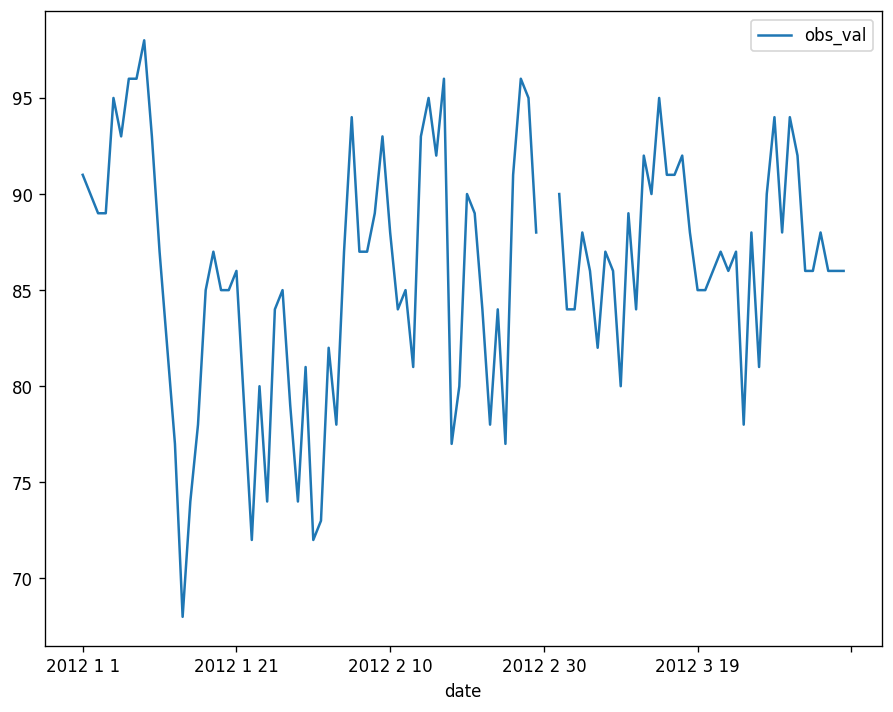

In [ ]:
from pandas import read_csv
from matplotlib import pyplot as plt 
 
series = read_csv('/content/drive/MyDrive/colombo_rh_2012-2018.csv', header=[0], parse_dates={'date':['year','month','day']}, index_col=[0])
series.drop(['station_id', 'station_name', 'element_name'], axis='columns', inplace=True)
print(series.head(10))
series.head(100).plot()
plt.show()

## Checking whether if the series is statiostationery (p-value < 0.05)

In [ ]:
from statsmodels.tsa.stattools import adfuller  
from numpy import log 

res = adfuller( series.obs_val.dropna()) 
print(series.obs_val) 
print('Augmented Dickey-Fuller Statistic: %f' % res[0])  
print('p-value: %f' % res[1])  

date
2012 1 1      91.0
2012 1 2      90.0
2012 1 3      89.0
2012 1 4      89.0
2012 1 5      95.0
              ... 
2018 12 27    90.0
2018 12 28    88.0
2018 12 29    76.0
2018 12 30    81.0
2018 12 31    82.0
Name: obs_val, Length: 4403, dtype: float64
Augmented Dickey-Fuller Statistic: -4.014920
p-value: 0.001334


## Plotting the original series graph, first-order differencing, and second-order differencing along with their autocorrelation graphs

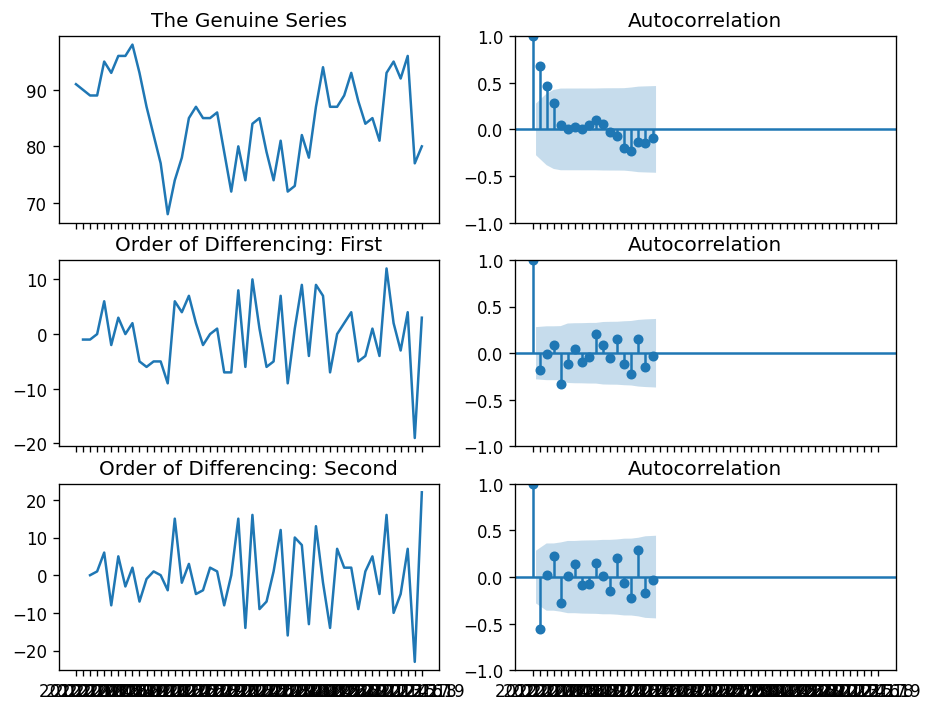

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.rcParams.update({'figure.figsize' : (9,7), 'figure.dpi' : 120})

values = series.obs_val.head(50).dropna()

# The Genuine Series  
fig, axes = plt.subplots(3, 2, sharex = True)  
axes[0, 0].plot(values); axes[0, 0].set_title('The Genuine Series')  
plot_acf(values, ax = axes[0, 1])  
  
# Order of Differencing: First  
axes[1, 0].plot(values.diff()); axes[1, 0].set_title('Order of Differencing: First')  
plot_acf(values.diff().dropna(), ax = axes[1, 1])  
  
# Order of Differencing: Second  
axes[2, 0].plot(values.diff().diff()); axes[2, 0].set_title('Order of Differencing: Second')  
plot_acf(values.diff().diff().dropna(), ax = axes[2, 1])  
  
plt.show()  

## Performing ADF, KPSS, and PP Tests

In [ ]:
#!pip install pmdarima
from pmdarima.arima.utils import ndiffs

X = series.obs_val.dropna()

# Augmented Dickey Fuller Test  

adftest = ndiffs(X, test = 'adf')  
  
# KPSS Test  
kpsstest = ndiffs(X, test = 'kpss')  
  
# PP Test  
pptest = ndiffs(X, test = 'pp')  
  
print("ADF Test =", adftest)  
print("KPSS Test =", kpsstest)  
print("PP Test =", pptest)  

ADF Test = 0
KPSS Test = 1
PP Test = 0


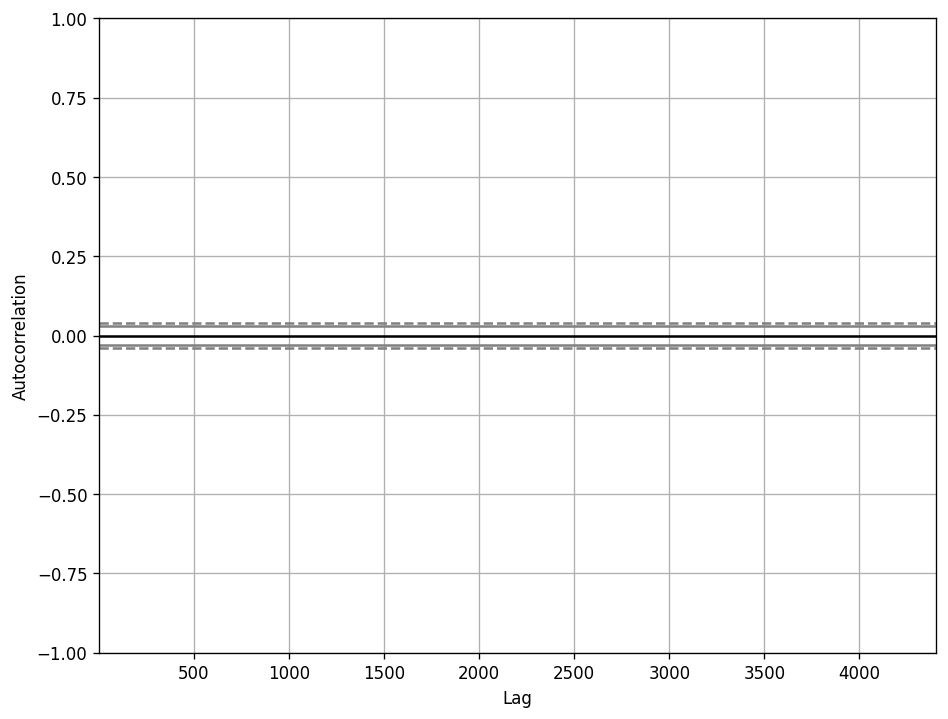

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
plt.show()

## Training The Model Splitting Data

Training dataset size:  4182
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4182
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -12364.083
Date:                Wed, 29 Mar 2023   AIC                          24740.166
Time:                        09:53:49   BIC                          24778.196
Sample:                             0   HQIC                         24753.617
                               - 4182                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4001      0.013    -31.581      0.000      -0.425      -0.375
ar.L2         -0.2742      0.014    -20.097      0.000      -0.301      -0.247
ar.L3         -0.2415  

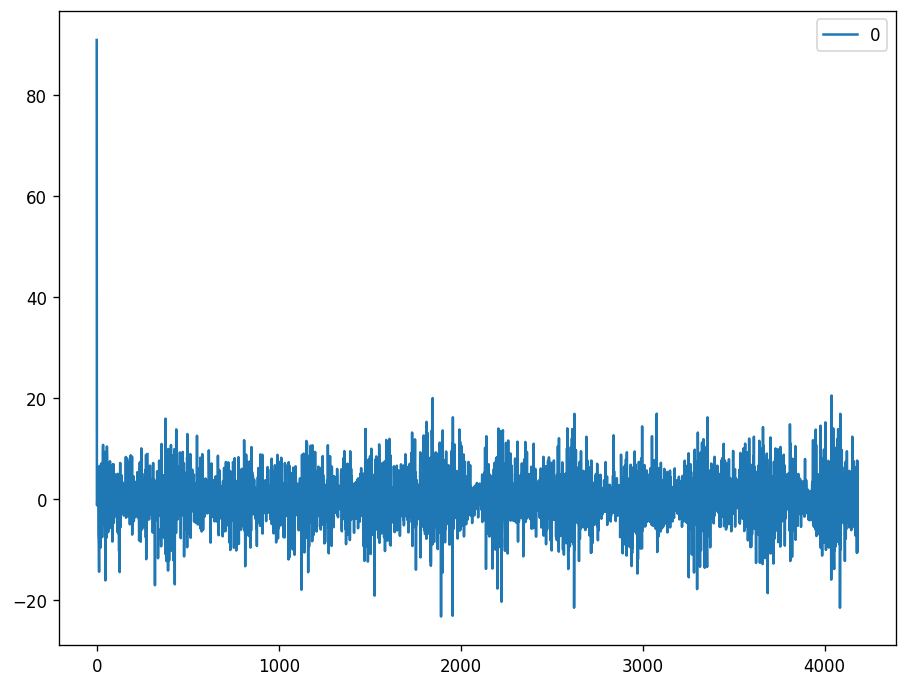

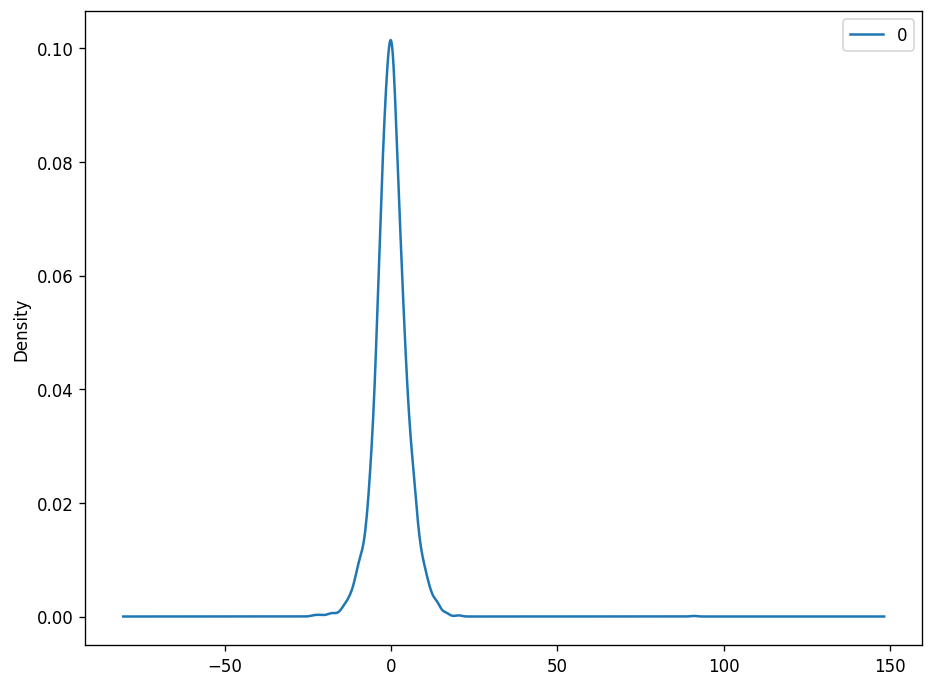

                 0
count  4162.000000
mean      0.022075
std       4.927851
min     -23.310396
25%      -2.735387
50%      -0.075686
75%       2.702285
max      91.000000


In [ ]:
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
import math
from sklearn.metrics import mean_squared_error

# split into train and test sets
X = series.values
size = int(len(X) * 0.95)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# Train model
print('Training dataset size: ', len(train))
model = ARIMA(train, order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

## Testing the Model

Testing dataset size:  4182
predicted=91.798469, expected=95.000000
predicted=92.298912, expected=93.000000
predicted=93.091872, expected=88.000000
predicted=88.771363, expected=80.000000
predicted=84.858964, expected=85.000000
predicted=86.246118, expected=81.000000
predicted=84.291278, expected=82.000000
predicted=83.518787, expected=84.000000
predicted=84.033868, expected=86.000000
predicted=84.475857, expected=87.000000
predicted=85.903915, expected=85.000000
predicted=84.566924, expected=84.000000
predicted=84.102167, expected=83.000000
predicted=83.727199, expected=87.000000
predicted=86.139113, expected=81.000000
predicted=82.974077, expected=84.000000
predicted=83.777600, expected=86.000000
predicted=85.255938, expected=82.000000
predicted=82.869172, expected=81.000000
predicted=82.249961, expected=86.000000
predicted=84.508645, expected=89.000000
predicted=87.116959, expected=88.000000
predicted=87.054127, expected=92.000000
predicted=89.206797, expected=88.000000
predicted=87

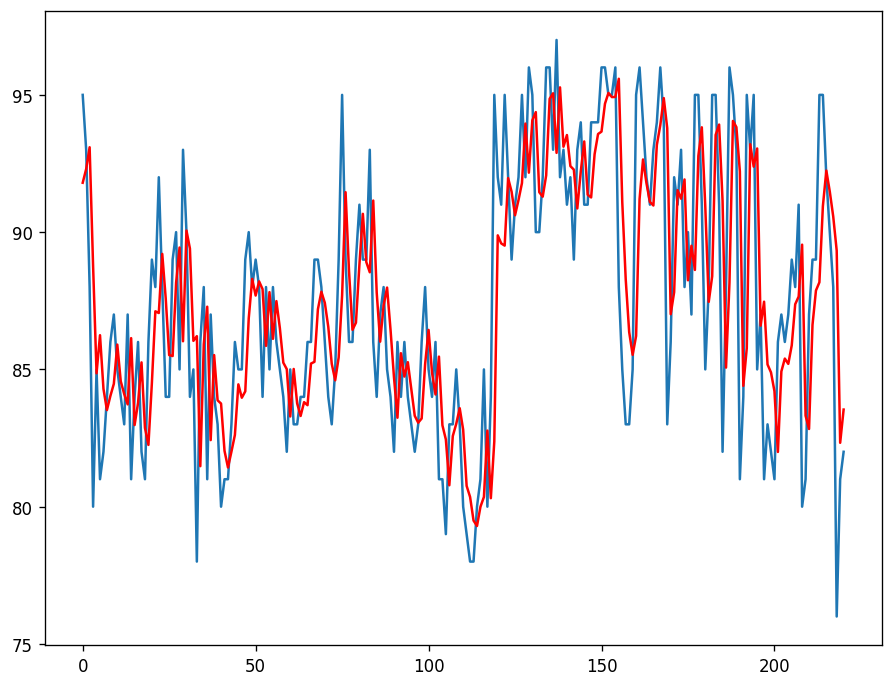

In [ ]:
# walk-forward validation
print('Testing dataset size: ', len(history))
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()